# Clustering
#### Clustering is an unsupervised machine learning technique used to group similar data points together based on patterns or features.
#### Unlike supervised learning, clustering does not use labeled data. Instead, it identifies hidden structures in the data.

### (K-Means):
#### Given a 2D dataset:

-Choose k (number of clusters).

-Randomly place k cluster centroids.

-Assign each data point to the nearest centroid.

-Update centroids to be the mean of assigned points.

-Repeat until convergence.


# Applying Kmeans-Clustering on Iris Dataset

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Cluster Indexes for each point:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


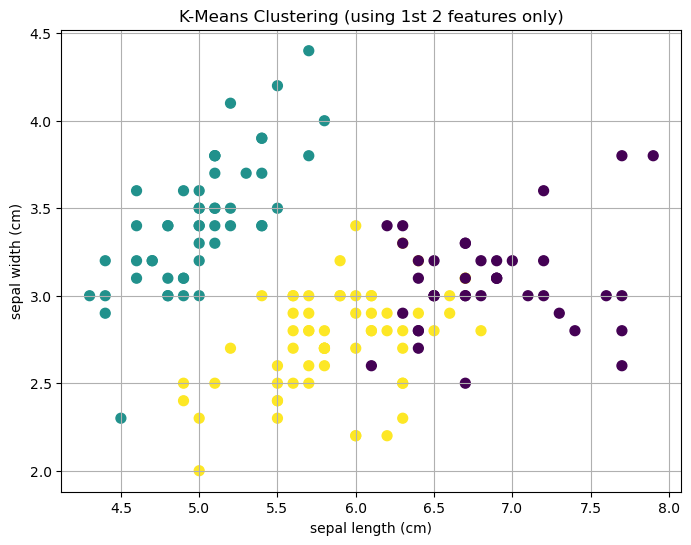

In [10]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data
y=iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())


kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print("Cluster Indexes for each point:\n",y_kmeans)

# Plot K-Means results on original feature space (first 2 features only)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('K-Means Clustering (using 1st 2 features only)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.show()

### Insights:
#### The resulting plot shows clustered flowers of Iris Dataset.

# Dimensionality reduction 
#### is the process of reducing the number of input variables (features or dimensions) in a dataset while preserving as much important information as possible
#### Dimensionality reduction simplifies complex datasets, making them easier to understand, visualize, and model—without losing key information.
#### **2 types**
#### -Feature Selection(select subset of original features)
#### -Feature Extraction(Transform the data into a lower-dimensional space using mathematical techniques.)

# Applying PCA(Principal Component Analysis)on IRIS dataset



After Dimesionality Reduction:
   Principal Component 1  Principal Component 2
0              -2.684126               0.319397
1              -2.714142              -0.177001
2              -2.888991              -0.144949
3              -2.745343              -0.318299
4              -2.728717               0.326755


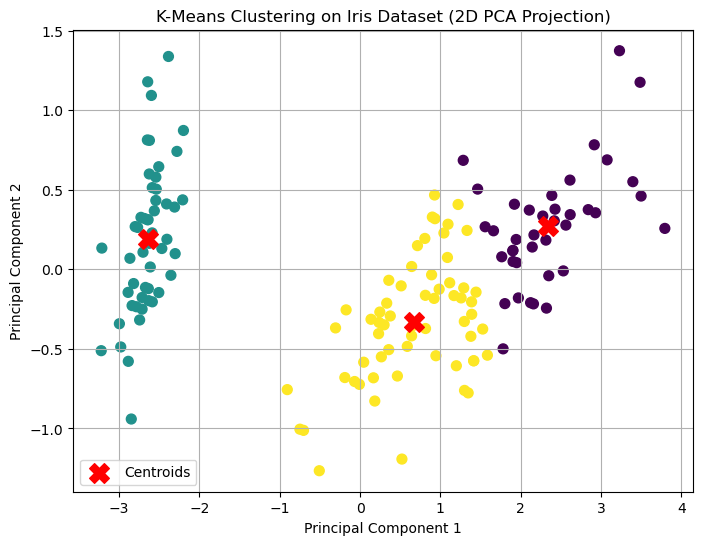

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

col=["Principal Component 1","Principal Component 2"]

df = pd.DataFrame(X_pca, columns=col)
print("After Dimesionality Reduction:")
print(df.head())

# Plot clustering results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Project cluster centers
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(col[0])
plt.ylabel(col[1])
plt.title('K-Means Clustering on Iris Dataset (2D PCA Projection)')
plt.legend()
plt.grid(True)
plt.show()

### Insights:
#### The resulting plot shows how the original 4D data is represented in 2D space while preserving as much variance as possible.